Dataset shape: (20640, 8)
Classes present: [0. 1. 2.]
Fold accuracies: [0.71345515 0.7128553 ]
Mean accuracy: 0.7131552233296419


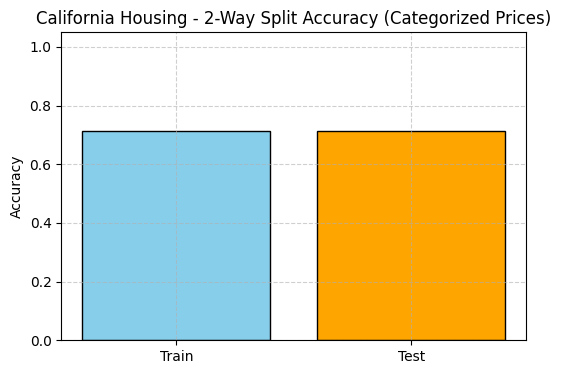

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

housing = fetch_california_housing()
X, y = housing.data, housing.target


p33, p66 = np.percentile(y, [33, 66])
y_cat = np.zeros(len(y))
y_cat[y <= p33] = 0
y_cat[(y > p33) & (y <= p66)] = 1
y_cat[y > p66] = 2

print("Dataset shape:", X.shape)
print("Classes present:", np.unique(y_cat))


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_cat, test_size=0.3, stratify=y_cat, random_state=42
)


model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)


train_acc = accuracy_score(y_train, model.predict(X_train))
test_acc = accuracy_score(y_test, model.predict(X_test))
scores = np.array([train_acc, test_acc])

print("Fold accuracies:", scores)
print("Mean accuracy:", scores.mean())


plt.figure(figsize=(6,4))
plt.bar(["Train", "Test"], scores, color=['skyblue', 'orange'], edgecolor='black')
plt.ylim(0, 1.05)
plt.ylabel("Accuracy")
plt.title("California Housing - 2-Way Split Accuracy (Categorized Prices)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()